In [1]:
import pandas as pd
import numpy as np
 
dfor = pd.read_csv(r'C:\Users\HP\Downloads\Order.csv')
dftp = pd.read_csv(r'C:\Users\HP\Downloads\Trips.csv')

In [2]:
dfor.size


641030

In [3]:
dfor.shape

(49310, 13)

In [4]:
dftp.shape

(2178, 5)

In [5]:
dfor.head(10)

,order_no,order_id,adults,pick_up_time,drop_down_time,pick_stop,drop_stop,travel_date,gross_sale,net_sale,is_cancelled,cancellation_reason,trip_id
0,677182,738243,2019-08-01 00:00:41,13:00:00,17:20:00,187,272,2019-08-12,101.00,26.00,False,NaN,22644
1,677182,738242,2019-08-01 00:00:41,10:45:00,15:00:00,272,65,2019-08-01,136.00,61.00,False,NaN,22618
2,677184,738245,2019-08-01 00:00:59,09:30:00,12:30:00,187,291,2019-08-01,38.00,38.00,False,NaN,26685
3,677185,738246,2019-08-01 00:04:05,07:10:00,11:40:00,186,59,2019-08-01,88.50,88.50,False,NaN,23355
4,677186,738247,2019-08-01 00:05:33,09:35:00,18:45:00,339,65,2019-08-01,35.00,35.00,False,NaN,22847
5,677188,738250,2019-08-01 00:05:57,16:10:00,19:30:00,247,62,2019-08-04,16.75,16.75,False,NaN,24848
6,677188,738249,2019-08-01 00:05:57,21:00:00,23:59:00,62,247,2019-08-02,11.75,11.75,False,NaN,24868
7,677189,738252,2019-08-01 00:07:29,15:30:00,19:05:00,62,74,2019-08-11,46.75,46.75,False,NaN,25875
8,677189,738251,2019-08-01 00:07:29,08:35:00,11:40:00,74,62,2019-08-03,39.75,39.75,False,NaN,21322
9,677190,738253,2019-08-01 00:08:44,08:00:00,14:50:00,187,305,2019-08-11,32.00,32.00,False,NaN,22799


In [6]:
dftp.head(10)

,trip_id,route_id,transport_provider,trip_date,trip_status
0,24693,241460,49.0,2019-08-24,COMPLETED
1,22888,229601,40.0,2019-08-18,COMPLETED
2,20376,209144,5.0,2019-08-24,CANCELLED
3,20334,209121,5.0,2019-08-03,CANCELLED
4,17626,191210,4.0,2019-08-28,COMPLETED
5,23556,233048,54.0,2019-08-11,COMPLETED
6,25887,256918,58.0,2019-08-05,COMPLETED
7,21591,222503,10.0,2019-08-15,COMPLETED
8,25070,245921,59.0,2019-08-11,COMPLETED
9,25054,245920,59.0,2019-08-03,COMPLETED


In [7]:
dfor.dtypes

order_no                 int64
order_id                 int64
adults                  object
pick_up_time            object
drop_down_time          object
pick_stop                int64
drop_stop                int64
travel_date             object
gross_sale             float64
net_sale               float64
is_cancelled              bool
cancellation_reason     object
trip_id                  int64
dtype: object

In [8]:
for col in dfor.columns:
    if dfor[col].dtype == 'object':
        try:
            dfor[col] = pd.to_datetime(dfor[col])
        except ValueError:
            pass

In [9]:
dfor.dtypes

order_no                        int64
order_id                        int64
adults                 datetime64[ns]
pick_up_time           datetime64[ns]
drop_down_time         datetime64[ns]
pick_stop                       int64
drop_stop                       int64
travel_date            datetime64[ns]
gross_sale                    float64
net_sale                      float64
is_cancelled                     bool
cancellation_reason            object
trip_id                         int64
dtype: object

In [19]:
dfor['diff'] = dfor['travel_date'].sub(dfor['adults'], axis=0)

In [20]:
dfor.head(10)

,order_no,order_id,adults,pick_up_time,drop_down_time,pick_stop,drop_stop,travel_date,gross_sale,net_sale,is_cancelled,cancellation_reason,trip_id,diff
0,677182,738243,2019-08-01 00:00:41,2020-08-06 13:00:00,2020-08-06 17:20:00,187,272,2019-08-12,101.00,26.00,False,NaN,22644,10 days 23:59:19
1,677182,738242,2019-08-01 00:00:41,2020-08-06 10:45:00,2020-08-06 15:00:00,272,65,2019-08-01,136.00,61.00,False,NaN,22618,-1 days +23:59:19
2,677184,738245,2019-08-01 00:00:59,2020-08-06 09:30:00,2020-08-06 12:30:00,187,291,2019-08-01,38.00,38.00,False,NaN,26685,-1 days +23:59:01
3,677185,738246,2019-08-01 00:04:05,2020-08-06 07:10:00,2020-08-06 11:40:00,186,59,2019-08-01,88.50,88.50,False,NaN,23355,-1 days +23:55:55
4,677186,738247,2019-08-01 00:05:33,2020-08-06 09:35:00,2020-08-06 18:45:00,339,65,2019-08-01,35.00,35.00,False,NaN,22847,-1 days +23:54:27
5,677188,738250,2019-08-01 00:05:57,2020-08-06 16:10:00,2020-08-06 19:30:00,247,62,2019-08-04,16.75,16.75,False,NaN,24848,2 days 23:54:03
6,677188,738249,2019-08-01 00:05:57,2020-08-06 21:00:00,2020-08-06 23:59:00,62,247,2019-08-02,11.75,11.75,False,NaN,24868,0 days 23:54:03
7,677189,738252,2019-08-01 00:07:29,2020-08-06 15:30:00,2020-08-06 19:05:00,62,74,2019-08-11,46.75,46.75,False,NaN,25875,9 days 23:52:31
8,677189,738251,2019-08-01 00:07:29,2020-08-06 08:35:00,2020-08-06 11:40:00,74,62,2019-08-03,39.75,39.75,False,NaN,21322,1 days 23:52:31
9,677190,738253,2019-08-01 00:08:44,2020-08-06 08:00:00,2020-08-06 14:50:00,187,305,2019-08-11,32.00,32.00,False,NaN,22799,9 days 23:51:16


In [29]:
dfor['diff'] = pd.to_datetime(dfor['diff']).dt.day

In [30]:
dfor.dtypes


order_no                        int64
order_id                        int64
adults                 datetime64[ns]
pick_up_time           datetime64[ns]
drop_down_time         datetime64[ns]
pick_stop                       int64
drop_stop                       int64
travel_date            datetime64[ns]
gross_sale                    float64
net_sale                      float64
is_cancelled                     bool
cancellation_reason            object
trip_id                         int64
diff                            int64
dtype: object

In [31]:
dfor.head(10)

,order_no,order_id,adults,pick_up_time,drop_down_time,pick_stop,drop_stop,travel_date,gross_sale,net_sale,is_cancelled,cancellation_reason,trip_id,diff
0,677182,738243,2019-08-01 00:00:41,2020-08-06 13:00:00,2020-08-06 17:20:00,187,272,2019-08-12,101.00,26.00,False,NaN,22644,11
1,677182,738242,2019-08-01 00:00:41,2020-08-06 10:45:00,2020-08-06 15:00:00,272,65,2019-08-01,136.00,61.00,False,NaN,22618,31
2,677184,738245,2019-08-01 00:00:59,2020-08-06 09:30:00,2020-08-06 12:30:00,187,291,2019-08-01,38.00,38.00,False,NaN,26685,31
3,677185,738246,2019-08-01 00:04:05,2020-08-06 07:10:00,2020-08-06 11:40:00,186,59,2019-08-01,88.50,88.50,False,NaN,23355,31
4,677186,738247,2019-08-01 00:05:33,2020-08-06 09:35:00,2020-08-06 18:45:00,339,65,2019-08-01,35.00,35.00,False,NaN,22847,31
5,677188,738250,2019-08-01 00:05:57,2020-08-06 16:10:00,2020-08-06 19:30:00,247,62,2019-08-04,16.75,16.75,False,NaN,24848,3
6,677188,738249,2019-08-01 00:05:57,2020-08-06 21:00:00,2020-08-06 23:59:00,62,247,2019-08-02,11.75,11.75,False,NaN,24868,1
7,677189,738252,2019-08-01 00:07:29,2020-08-06 15:30:00,2020-08-06 19:05:00,62,74,2019-08-11,46.75,46.75,False,NaN,25875,10
8,677189,738251,2019-08-01 00:07:29,2020-08-06 08:35:00,2020-08-06 11:40:00,74,62,2019-08-03,39.75,39.75,False,NaN,21322,2
9,677190,738253,2019-08-01 00:08:44,2020-08-06 08:00:00,2020-08-06 14:50:00,187,305,2019-08-11,32.00,32.00,False,NaN,22799,10


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

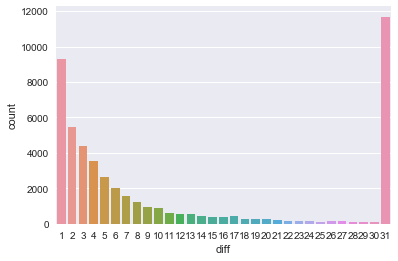

In [39]:
sns.countplot(x='diff', data= dfor);

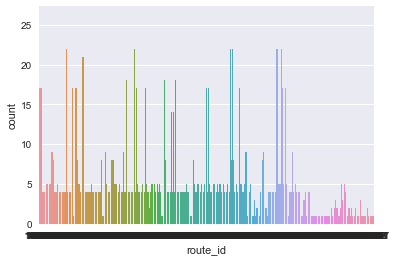

In [36]:
sns.countplot(x='route_id', data= dftp); 

In [41]:
duplidf = dfor[dfor.duplicated(['order_no'])]

In [42]:
duplidf

,order_no,order_id,adults,pick_up_time,drop_down_time,pick_stop,drop_stop,travel_date,gross_sale,net_sale,is_cancelled,cancellation_reason,trip_id,diff
1,677182,738242,2019-08-01 00:00:41,2020-08-06 10:45:00,2020-08-06 15:00:00,272,65,2019-08-01,136.00,61.00,False,NaN,22618,31
6,677188,738249,2019-08-01 00:05:57,2020-08-06 21:00:00,2020-08-06 23:59:00,62,247,2019-08-02,11.75,11.75,False,NaN,24868,1
8,677189,738251,2019-08-01 00:07:29,2020-08-06 08:35:00,2020-08-06 11:40:00,74,62,2019-08-03,39.75,39.75,False,NaN,21322,2
14,677194,738258,2019-08-01 00:09:50,2020-08-06 14:00:00,2020-08-06 18:40:00,187,186,2019-08-06,75.50,75.50,False,NaN,20875,5
18,677197,738261,2019-08-01 00:10:29,2020-08-06 04:35:00,2020-08-06 07:45:00,291,65,2019-08-01,24.00,24.00,False,NaN,26251,31
20,677198,738264,2019-08-01 00:11:18,2020-08-06 14:00:00,2020-08-06 18:35:00,317,253,2019-08-07,19.00,19.00,False,NaN,25210,6
35,677213,738279,2019-08-01 00:19:49,2020-08-06 18:00:00,2020-08-06 21:30:00,187,291,2019-08-01,29.00,29.00,False,NaN,26782,31
40,677217,738285,2019-08-01 00:22:16,2020-08-06 17:00:00,2020-08-06 19:20:00,293,65,2019-08-04,17.00,17.00,False,NaN,26061,3
45,677222,738292,2019-08-01 00:30:09,2020-08-06 16:00:00,2020-08-06 22:45:00,64,296,2019-08-11,32.00,32.00,False,NaN,25699,10
49,677225,738296,2019-08-01 00:34:55,2020-08-06 18:15:00,2020-08-06 23:00:00,59,186,2019-08-23,87.50,87.50,False,NaN,20192,22


In [43]:
duplidf.shape

(6050, 14)

In [59]:
import pandasql as pdsql


In [73]:
dftp.isnull().sum()

trip_id                0
route_id               0
transport_provider    58
trip_date              0
trip_status            0
dtype: int64

In [74]:
dfor.isnull().sum()

order_no                   0
order_id                   0
adults                     0
pick_up_time               0
drop_down_time             0
pick_stop                  0
drop_stop                  0
travel_date                0
gross_sale                 0
net_sale                   0
is_cancelled               0
cancellation_reason    46398
trip_id                    0
diff                       0
dtype: int64

In [77]:
dfm=pd.merge(dfor,dftp,on='trip_id')
dfm

,order_no,order_id,adults,pick_up_time,drop_down_time,pick_stop,drop_stop,travel_date,gross_sale,net_sale,is_cancelled,cancellation_reason,trip_id,diff,route_id,transport_provider,trip_date,trip_status
0,677182,738243,2019-08-01 00:00:41,2020-08-06 13:00:00,2020-08-06 17:20:00,187,272,2019-08-12,101.00,26.00,False,NaN,22644,11,227791,24.0,2019-08-12,COMPLETED
1,677641,738796,2019-08-01 04:54:05,2020-08-06 13:00:00,2020-08-06 17:45:00,187,271,2019-08-12,21.00,21.00,False,NaN,22644,11,227791,24.0,2019-08-12,COMPLETED
2,680390,741973,2019-08-02 18:35:33,2020-08-06 13:00:00,2020-08-06 16:50:00,187,61,2019-08-12,29.00,29.00,True,Missed Bus,22644,10,227791,24.0,2019-08-12,COMPLETED
3,680833,742463,2019-08-02 23:08:55,2020-08-06 13:00:00,2020-08-06 18:10:00,187,301,2019-08-12,42.00,42.00,True,NaN,22644,10,227791,24.0,2019-08-12,COMPLETED
4,682843,744711,2019-08-04 14:54:56,2020-08-06 13:00:00,2020-08-06 16:50:00,187,61,2019-08-12,26.00,26.00,True,NaN,22644,8,227791,24.0,2019-08-12,COMPLETED
5,686950,749429,2019-08-07 00:48:23,2020-08-06 13:00:00,2020-08-06 16:50:00,187,61,2019-08-12,56.00,56.00,False,NaN,22644,5,227791,24.0,2019-08-12,COMPLETED
6,691678,754995,2019-08-09 18:18:00,2020-08-06 13:00:00,2020-08-06 18:10:00,187,301,2019-08-12,140.00,140.00,False,NaN,22644,3,227791,24.0,2019-08-12,COMPLETED
7,693895,757514,2019-08-11 02:15:19,2020-08-06 13:00:00,2020-08-06 16:50:00,187,61,2019-08-12,31.00,31.00,False,NaN,22644,1,227791,24.0,2019-08-12,COMPLETED
8,694189,757840,2019-08-11 11:25:31,2020-08-06 13:00:00,2020-08-06 17:45:00,187,271,2019-08-12,25.00,25.00,False,NaN,22644,1,227791,24.0,2019-08-12,COMPLETED
9,694772,758474,2019-08-11 17:31:18,2020-08-06 13:00:00,2020-08-06 16:50:00,187,61,2019-08-12,31.00,31.00,False,NaN,22644,1,227791,24.0,2019-08-12,COMPLETED


In [72]:
dftp['trip_status'].value_counts()

COMPLETED    1640
CANCELLED     538
Name: trip_status, dtype: int64

In [78]:
dfm[dfm.trip_status=='COMPLETED'].groupby('drop_stop').size()

drop_stop
3       501
4       260
5       541
11       35
12      311
53       15
54      159
59     6084
60      607
61      409
62     7304
65     5589
72       51
74      287
186    2575
209    1088
210     165
211     180
213     188
236     133
244     286
247     570
253    1172
254     899
255     134
256      53
257      79
259      69
262      46
263     170
       ... 
302      28
304     113
305     217
306     142
307      49
316      56
317    1522
318     600
319      70
320     122
331    1203
339     482
340     211
342     259
343      42
349       3
350       3
351       4
352      97
356      24
357       3
360     484
361     293
362     178
363      51
364      12
365      21
366      19
370       8
423       2
Length: 73, dtype: int64

In [79]:
dfm[dfm.trip_status=='COMPLETED'].groupby('pick_stop').size()

pick_stop
1       722
2       123
8       177
9       134
10      184
51       63
52      394
59     3531
60      528
61      351
62     6471
63      952
64      515
73       37
74      255
176    1215
186    1805
187    6457
209    1039
210     174
211     190
213     148
236     489
244     145
247     592
253     943
254     789
255     124
256      61
257      91
       ... 
302      29
304      91
305     221
306     126
307      58
316      52
317    1930
318     427
319      69
320     106
331     955
332      25
338     970
339     393
340     196
342     200
343      30
349       3
350       3
351       9
353      96
357      16
360     486
361     290
362     181
363      49
364      15
365       5
366      43
423       1
Length: 78, dtype: int64